In [26]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import calendar

In [28]:
df = pd.read_excel("GWLData_BWDBRAB504GWD_UPDATEDmax, min, avgMonthlyFull.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [29]:
df = df.sort_values(by = ["YEAR","MONTH"])

In [30]:
monthly = df.groupby("MONTH").agg({'MAXOFGWD_UPDATED': 'max',
                                  'MINOFGWD_UPDATED': 'min',
                                  'AVGOFGWD_UPDATED': 'mean'
                                                   })

In [31]:
monthly = monthly.reset_index()
monthly['MONTH'] = monthly['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [32]:
monthly.columns = ["Month", "Maximum","Minimum","Average"]

In [33]:
month_order = ["Apr", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar"]
monthly = monthly.set_index(monthly["Month"]).loc[month_order]

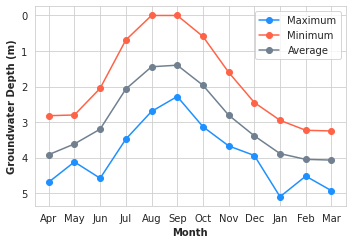

In [38]:
plt.rcParams["figure.figsize"] = (5,3.5)

sns.set_style("whitegrid")

fig, ax = plt.subplots()
fig= plt.plot(monthly["Maximum"], color = 'dodgerblue',marker = 'o', label = "Maximum")
fig = plt.plot(monthly["Minimum"], color = 'tomato',marker = 'o', label = "Minimum")
fig = plt.plot(monthly["Average"], color = 'slategrey',marker = 'o', label = "Average")
plt.legend()
# plt.yticks(np.arange(0,11,1))
plt.gca().invert_yaxis()
plt.xlabel("Month", fontweight="semibold")
plt.ylabel("Groundwater Depth (m)", fontweight="semibold")
plt.tight_layout()
plt.savefig("RAB504_GL.jpg", dpi = 500)
plt.show()

In [35]:
monthly.to_excel("RAB504_GL_monthly.xlsx")

In [36]:
df.describe()

,YEAR,MONTH,MAXOFGWD_UPDATED,MINOFGWD_UPDATED,AVGOFGWD_UPDATED
count,242.000000,242.000000,242.000000,242.000000,242.000000
mean,2000.256198,6.033058,3.266157,2.828347,3.047810
std,9.800101,3.323334,0.995188,1.107121,1.047872
min,1979.000000,1.000000,0.360000,0.000000,0.170000
25%,1997.000000,3.000000,2.492500,1.812500,2.065000
50%,2002.000000,6.000000,3.610000,3.200000,3.410000
75%,2007.000000,9.000000,4.057500,3.815000,3.937500
max,2013.000000,12.000000,5.100000,4.400000,4.680000
